## Assignment
Yeah ! Let's start with our actual project. In this assignment we will load the database and do preprocessing tasks.
Ensure you have following packages installed
1. numpy
2. pandas  
( Hope you are familiar with above two modules well )
3. nltk (don't worry, we just need this to remove stopwords while preprocessing)
4. tensorflow
5. keras
6. scikit-learn

In [1]:
'''
Importing essential libraries and functions
'''
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.model_selection import train_test_split
import io
import json
from nltk.tokenize import word_tokenize

## 1. Loading the IMDB Reviews Dataset

In [2]:
# TODO:
df=pd.read_csv("C:\IIT B\IMDB Reviews Sentiment Analysis\IMDB_Dataset.csv")

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df['review'][11212]

'My friends and I were just discussing how frustrated we are with the way movies and especially romantic comedy\'s are being made. We feel offended by the schlock that Hollywood is serving up these days as they act like all is well.<br /><br />Well all is not well...with the exception of a few bright spots, like this movie. It doesn\'t have the big name actors, the big budget, I don\'t think it had a big release (I rented from Hollywood Video) it didn\'t really have anything that most big budget romantic comedy\'s have.<br /><br />But it did have what most of those lack. It had great chemistry between the love interests, "Parker" (Jonathan Schaech) and "Sam" (Alison Eastwood). Their love story wasn\'t forced on us like so many. The director took his time to allow these characters to truly get to know each other. Their story reminded me of one of my favorites, "Tootsie".<br /><br />The supporting cast added not only really funny comic moments, but depth to the story as well. James LeGro

In [5]:
df.shape
# 50000 rows and 2 columns

(50000, 2)

In [6]:
df.isnull().sum()
# no missing data

review       0
sentiment    0
dtype: int64

In [7]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
# From here we can see that the data is balanced i.e equal number of samples in both the categories

## 2. Data Preprocessing

In [9]:
'''#TODO : Complete the function to preprocess the text data

def preprocessing(sentence):
    sentence=sentence.lower() # First make the sentence lowercase
    sentence=re.sub('<.*?>',' ',sentence) # Remove all html tags from the sentence i.e replace anything between <> with space
    sentence=re.sub(r'[^a-zA-Z0-9]',' ',sentence)     # Remove all special characters i.e. anything other than alphabets and numbers. Replace them with space
    sentence=re.sub(r'\b[a-zA-Z]\b',' ',sentence) # Remove all single characters i.e. a-z and A-Z and Replace them with space
    sentence=re.sub(r'\s+',' ',sentence) # Remove all multiple spaces and replace them with single space
    # Use the nltk library to remove all stopwords from the sentence
    stop_words = set(stopwords.words('english'))
    sentence = word_tokenize(sentence)
    filtered_words = [i for i in sentence if i.lower() not in stop_words]
    cleaned_sentence = ' '.join(filtered_words)
    return cleaned_sentence
'''

"#TODO : Complete the function to preprocess the text data\n\ndef preprocessing(sentence):\n    sentence=sentence.lower() # First make the sentence lowercase\n    sentence=re.sub('<.*?>',' ',sentence) # Remove all html tags from the sentence i.e replace anything between <> with space\n    sentence=re.sub(r'[^a-zA-Z0-9]',' ',sentence)     # Remove all special characters i.e. anything other than alphabets and numbers. Replace them with space\n    sentence=re.sub(r'\x08[a-zA-Z]\x08',' ',sentence) # Remove all single characters i.e. a-z and A-Z and Replace them with space\n    sentence=re.sub(r'\\s+',' ',sentence) # Remove all multiple spaces and replace them with single space\n    # Use the nltk library to remove all stopwords from the sentence\n    stop_words = set(stopwords.words('english'))\n    sentence = word_tokenize(sentence)\n    filtered_words = [i for i in sentence if i.lower() not in stop_words]\n    cleaned_sentence = ' '.join(filtered_words)\n    return cleaned_sentence\n"

In [10]:
def preprocessing(sentence):
    sentence=sentence.lower()
    sentence=re.sub('<.*?>',' ',sentence)  # th
    sentence=re.sub(r'[^a-zA-Z0-9\s]',' ',sentence)
    #sentence=re.sub(r'\s+',' ',sentence)

    stop_words=stopwords.words('english')
    sentence=word_tokenize(sentence)
    l=[]
    for i in sentence:
        if i in stop_words:
            l.append('')
        else:
            l.append(i)
    cleaned_sentence=' '.join(l)
    cleaned_sentence=re.sub(r'\s+',' ',cleaned_sentence)
    return cleaned_sentence

In [11]:
print(preprocessing('SAHIL IS A <****> BOY !?!'))

sahil boy


In [12]:
# TODO :
# Call the preprocessing function for each review in the dataframe and
# save the results in a new list of preprocessed_reviews
preprocessed_reviews=[]
for i in range(0,df.shape[0]): # df.shape will give a tuple (rows,columns) , so from this picked up the number of rows 
    list=df['review'].tolist() # converted the review column to a list for east access 
    text=list[i]
    text=preprocessing(text)
    preprocessed_reviews.append(text)
    
# This list will be your input to the neural network
# We will call this list as X from now on
X=preprocessed_reviews

In [13]:
# TODO :

df['sentiment']=df['sentiment'].replace({'positive':1,'negative':0})# Convert sentiment column in the dataframe to numbers
y=np.array(df['sentiment'])# Convert positive to 1 and negative to 0 and store it in numpy array
y=y.reshape(50000,1)
# We will call this numpy array as y from now on

C:\Users\Sahil\AppData\Local\Temp\ipykernel_372\364436640.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment']=df['sentiment'].replace({'positive':1,'negative':0})# Convert sentiment column in the dataframe to numbers


In [14]:
# TODO : Split the data into training and testing (80-20 ratio)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=21)
# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

In [15]:
Y_train_=Y_train.reshape(40000,)

In [16]:
X_train[10] # so you can see that this is how a review looks like post pre processing 

'wow opinion net excellent nail biting edge seat techno thriller leave feeling good first saw feeling good days angela sandra bullock went mexico thought really nice place vacation moment jack jermey northam ruth wendy gazelle began chasing thought let anything bad happen please also took quite deep breaths prevent screaming already bright side ask house luxurious spacious conclusion give excellent nail biting edge seat techno thriller four stars'

## lemmatization Noun +Verb

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to tokenize and lemmatize a sentence without POS tagging
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='n') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in lemmatized_tokens]
    return lemmatized_tokens


In [18]:
print('tokens post lemmatisation:',tokenize_and_lemmatize('sahil good boy icecream boys played plays play '))

tokens post lemmatisation: ['sahil', 'good', 'boy', 'icecream', 'boy', 'play', 'play', 'play']


In [19]:
# so in this we have created a function to word tokenize the text first and then lemmatize it 
# so as you can see in the above example that we have given it a sample sentence and it has firstly word_tokenised it and then 
# it has passed it to lemmatizer word by word and we have saved it back in a list 

In [20]:
# Tokenize and lemmatize the text data
X_train = [' '.join(tokenize_and_lemmatize(text)) for text in X_train]
X_test = [' '.join(tokenize_and_lemmatize(text)) for text in X_test]

In [21]:
X_train[10]

'wow opinion net excellent nail bite edge seat techno thriller leave feel good first saw feel good day angela sandra bullock go mexico think really nice place vacation moment jack jermey northam ruth wendy gazelle begin chase think let anything bad happen please also take quite deep breath prevent scream already bright side ask house luxurious spacious conclusion give excellent nail bite edge seat techno thriller four star'

# TOKENIZER

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert the text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [23]:
# Check the vocabulary size after applying num_words
vocab_size = min(len(tokenizer.word_index) + 1, tokenizer.num_words)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 50000


In [24]:
'''
vocab_size = len(tokenizer.word_index)
vocab_size
'''

'\nvocab_size = len(tokenizer.word_index)\nvocab_size\n'

In [25]:
len(X_train_sequences[10])

68

In [26]:
X_train_sequences[10]

[1170,
 478,
 3747,
 237,
 2073,
 104,
 968,
 1418,
 6852,
 502,
 101,
 60,
 10,
 33,
 127,
 60,
 10,
 90,
 3271,
 2836,
 3811,
 13,
 2558,
 16,
 18,
 257,
 140,
 2108,
 162,
 543,
 35309,
 8042,
 3555,
 4637,
 25149,
 132,
 619,
 16,
 158,
 148,
 27,
 105,
 423,
 30,
 35,
 100,
 713,
 2377,
 2118,
 814,
 391,
 1626,
 335,
 357,
 215,
 10944,
 17210,
 1006,
 34,
 237,
 2073,
 104,
 968,
 1418,
 6852,
 502,
 526,
 74]

In [27]:
'''
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(["sahil good boy play play icecream",'sahil like mango icecream tasy good sweet'])

sequences= tokenizer.texts_to_sequences(["sahil good boy play play icecream",'sahil like mango icecream tasy good sweet'])
sequences '''

'\ntokenizer = Tokenizer(num_words=10000, oov_token=\'<OOV>\')\ntokenizer.fit_on_texts(["sahil good boy play play icecream",\'sahil like mango icecream tasy good sweet\'])\n\nsequences= tokenizer.texts_to_sequences(["sahil good boy play play icecream",\'sahil like mango icecream tasy good sweet\'])\nsequences '

#### Padding

In [28]:
# let us figure out the average length of words in the reviews of X_train
l=len(X_train_sequences)
b=0
for i in X_train_sequences:
   b=b+len(i)

print(b/l)
#so at an average a review has got 119 words 

119.599175


In [29]:
X_train_sequences[0]

[3440,
 3132,
 12658,
 1685,
 502,
 65,
 2282,
 2226,
 1076,
 4410,
 1148,
 398,
 78,
 11,
 263,
 208,
 1275,
 4636,
 100,
 10,
 10528,
 1488,
 5,
 17208,
 6183,
 652,
 371]

In [30]:
# Padding all reviews to be of same length 'maxlen' words
maxlen = 120
# You can try different dimensions like 50, 100, 200 and 300
# and see how the model performs in next week
from tensorflow.keras.preprocessing.sequence import pad_sequences
# TODO: Pad the training data sequences
X_train_pad=pad_sequences(X_train_sequences,padding='post',maxlen=maxlen)
# Hint: Use pad_sequences with 'post' padding and maxlen=maxlen

# TODO: Pad the test data sequences
X_test_pad=pad_sequences(X_test_sequences,padding='post',maxlen=maxlen)
# Hint: Use pad_sequences with 'post' padding and maxlen=maxlen

In [31]:
X_train_pad

array([[ 3440,  3132, 12658, ...,     0,     0,     0],
       [ 8158,     3,  1091, ...,    40,  2144,     9],
       [   10,   327,    97, ...,     0,     0,     0],
       ...,
       [  237,     3,  8175, ...,     0,     0,     0],
       [  255,   134,   287, ...,  2193,   216,     0],
       [   33,   229,     2, ...,     0,     0,     0]])

# Glove Embedding

In [32]:
vocab_size # this is total size of the vocabulary , i.e the total number of unique words in the corpus
# remember the fact that we limited it to 30k , even though we have a total of 74k words in the corpus!!

50000

In [33]:

# Initialize an empty dictionary for embeddings
embeddings_dictionary = dict()

# Open the GloVe file (a2_glove.6B.100d.txt) with utf-8 encoding
glove_file = open("C:\IIT B\IMDB Reviews Sentiment Analysis\glove_embeddings.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [35]:
# EMBEDDING MATRIX
vocab_size = min(len(tokenizer.word_index) + 1, tokenizer.num_words)
top_words = {word: index for word, index in tokenizer.word_index.items() if index < vocab_size}

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in top_words.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [38]:
top_words

{'<OOV>': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'make': 5,
 'like': 6,
 'see': 7,
 'get': 8,
 'time': 9,
 'good': 10,
 'character': 11,
 'watch': 12,
 'go': 13,
 'even': 14,
 'story': 15,
 'think': 16,
 'would': 17,
 'really': 18,
 'show': 19,
 'well': 20,
 'scene': 21,
 'look': 22,
 'much': 23,
 'know': 24,
 'say': 25,
 'end': 26,
 'bad': 27,
 'people': 28,
 'great': 29,
 'also': 30,
 'love': 31,
 'act': 32,
 'first': 33,
 'give': 34,
 'take': 35,
 'play': 36,
 'way': 37,
 'come': 38,
 'thing': 39,
 'find': 40,
 'life': 41,
 'could': 42,
 'seem': 43,
 'work': 44,
 'actor': 45,
 'plot': 46,
 'two': 47,
 'many': 48,
 'year': 49,
 'want': 50,
 'never': 51,
 'best': 52,
 'try': 53,
 'little': 54,
 'ever': 55,
 'man': 56,
 'better': 57,
 'still': 58,
 'part': 59,
 'feel': 60,
 'something': 61,
 'back': 62,
 'director': 63,
 'lot': 64,
 'interest': 65,
 'real': 66,
 'performance': 67,
 'guy': 68,
 'use': 69,
 'woman': 70,
 'cast': 71,
 'funny': 72,
 'old': 73,
 'star': 74,
 'though': 75,


In [41]:
embedding_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38251001, 0.14821   , 0.60601002, ..., 0.058921  , 0.091112  ,
        0.47283   ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
embedding_matrix.shape
# so each unique word has been represented as a 100 dimensional vector , using pre traning GloVe embeddings

(50000, 100)

In [43]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Embedding,BatchNormalization, Dropout
from keras.optimizers import Adam

In [44]:
vocab_size = min(len(tokenizer.word_index) + 1, tokenizer.num_words)
embedding_dim = 100
input_length = maxlen  # maxlen is the max number of words in a document which we set to 120 before padding 
                       # embedding_dim is the number of dimensions in which a single words is being represented i.e the numner of input nodes in 
                       # your architecture

In [45]:
model=Sequential()

model.add(Embedding(input_dim=vocab_size, # vocab size
                    output_dim=embedding_dim, # dim of word vectors post embedding 
                    weights=[embedding_matrix], # pre tranied embedding matrix
                    input_length=maxlen, # this is the length of the words in a given document , we set this before padding, currently its 120
                    trainable=False))


model.add(LSTM(128,return_sequences=True,input_shape=(maxlen,embedding_dim)))
model.add(LSTM(64))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

C:\IIT B\Python Virtual Env\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\IIT B\Python Virtual Env\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.build(input_shape=(maxlen,embedding_dim))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (120, 100, 100)             │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (120, 100, 128)             │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (120, 64)                   │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (120, 64)                   │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (120, 64)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (120, 1)                    │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,170,881 (19.73 MB)

 Trainable params: 170,881 (667.50 KB)

 Non-trainable params: 5,000,000 (19.07 MB)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.001,restore_best_weights=True,patience=20,verbose=1)

In [48]:
# Cool we have 9.2M non-trainable parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
history=model.fit(X_train_pad,Y_train,validation_data=(X_test_pad,Y_test),epochs=25,batch_size=64,callbacks=es)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 218ms/step - accuracy: 0.6562 - loss: 0.6179 - val_accuracy: 0.5014 - val_loss: 0.6929
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 203ms/step - accuracy: 0.5082 - loss: 0.6929 - val_accuracy: 0.5014 - val_loss: 0.6933
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.5163 - loss: 0.6916 - val_accuracy: 0.5325 - val_loss: 0.6891
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.7194 - loss: 0.5461 - val_accuracy: 0.8289 - val_loss: 0.3901
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - accuracy: 0.8356 - loss: 0.3737 - val_accuracy: 0.8478 - val_loss: 0.3522
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 201ms/step - accuracy: 0.8517 - loss: 0.3418 - val_accuracy: 0.8434 - val_loss: 0.3545
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.8633 - loss: 0.3218 - val_accuracy: 0.8566 - val_loss: 0.3363
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.8712 -

# GRAPHS

> Loss vs Valdiation loss

In [50]:
import matplotlib.pyplot as plt

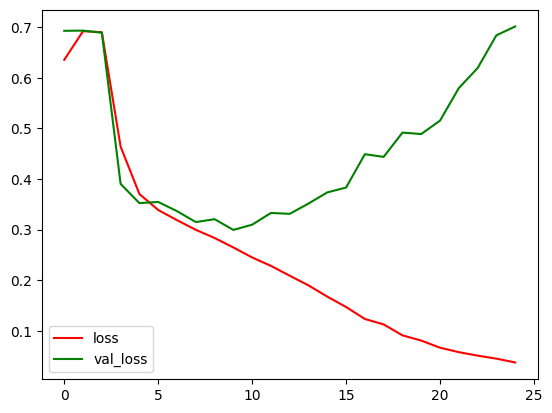

In [51]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.legend(['loss','val_loss'])
# the model is not overfitting 

> Accuracy vs val_accuracy

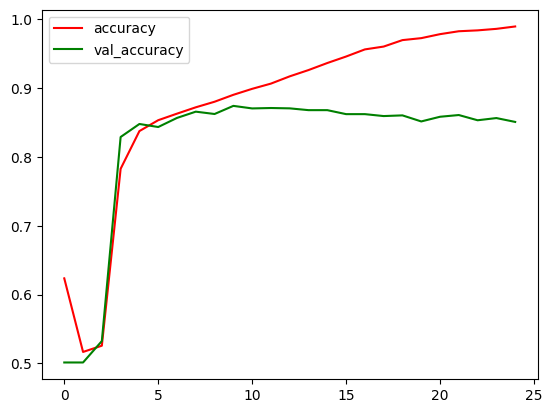

In [52]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.legend(['accuracy','val_accuracy'])
# the model is not overfitting 

# ACCURACY OF OUR MODEL

In [53]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve, roc_auc_score,auc
# let us firstly figure out the threshhold using roc_curve
# and then we will move towards other metrics 

In [54]:
Y_scores=model.predict(X_test_pad)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step


In [55]:
Y_scores=Y_scores.reshape(10000,)
Y_scores

array([0.8330495 , 0.603348  , 0.9919506 , ..., 0.9392355 , 0.00847434,
       0.00647633], dtype=float32)

In [56]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)

In [57]:
thresholds

array([          inf, 9.9868482e-01, 9.9368411e-01, ..., 2.0190736e-03,
       2.0187353e-03, 5.2716903e-04], dtype=float32)

In [58]:
fpr

array([0.00000000e+00, 2.00561572e-04, 2.00561572e-04, ...,
       9.87765744e-01, 9.88166867e-01, 1.00000000e+00])

In [59]:
tpr

array([0.        , 0.        , 0.03530116, ..., 1.        , 1.        ,
       1.        ])

Text(0, 0.5, 'TPR')

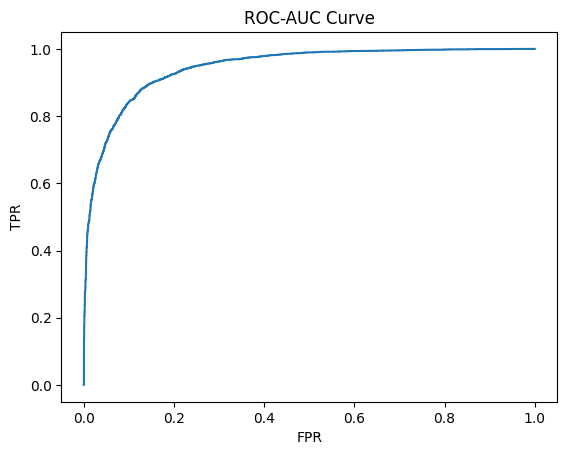

In [60]:
plt.plot(fpr,tpr)
plt.title('ROC-AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

#### WE WANT THE THRESHOLD FOR WHICH TPR-FPR CURVE IS CLOSEST TO (0,1) i.e the point where the difference between tpr and fpr is max

In [61]:
optimal_idx = np.argmax(tpr - fpr) # THIS IS THE 
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.46972537


In [70]:
thresholds.shape

(1872,)

## AREA UNDER THE ROC-AUC CURVE

In [71]:
A=auc(fpr,tpr)
# Trpezoidal rule to calculate the area under the curve

In [63]:
score=roc_auc_score(Y_test,Y_scores)
score

0.945714814404145

In [64]:
Y_pred=np.where(Y_scores>=optimal_threshold,1,0)
print(accuracy_score(Y_pred,Y_test))

0.8765


In [65]:
print(f1_score(Y_pred,Y_test))

0.8774193548387097


## ROC -AUC FOR MULITCLASS CLASSIFICATION BECOMES VERY COMPLEX AND THUS WE DONT USUALLY USE IT THERE , ALSO WE HAVE GOOD METRICS LIKE F1 ETC WHICH ARE SIMPLE TO UNDERSTAND AS WELLL